# The Sparks Foundation - Data Science and Business Analystics Internship

**Task 1 :- Prediction using Supervised Machine Learning (ML)**

**Objective:**

**Perform ‘Exploratory Data Analysis’ on dataset "SampleSuperstore"**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
df.duplicated().sum()

17

In [8]:
df.drop_duplicates()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [9]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [10]:
col = ['Postal Code']
df = df.drop(columns=col, axis=1)

In [11]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


In [12]:
df.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


In [13]:
df.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [14]:
df.cov()

,Sales,Quantity,Discount,Profit
Sales,388434.455308,278.459923,-3.627228,69944.096586
Quantity,278.459923,4.951113,0.003961,34.534769
Discount,-3.627228,0.003961,0.042622,-10.615173
Profit,69944.096586,34.534769,-10.615173,54877.798055


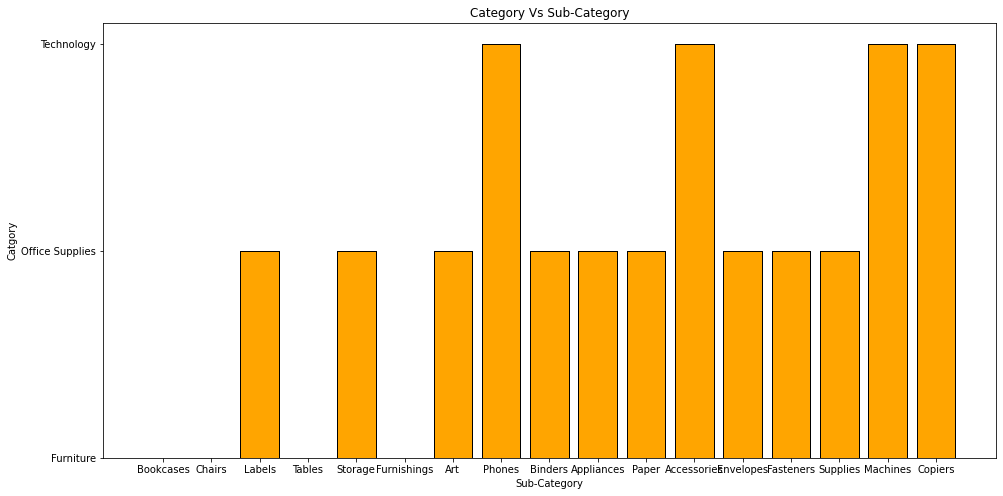

In [15]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category','Category', data=df, color='orange', edgecolor='black')
plt.title('Category Vs Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Catgory')
plt.show()

In [16]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

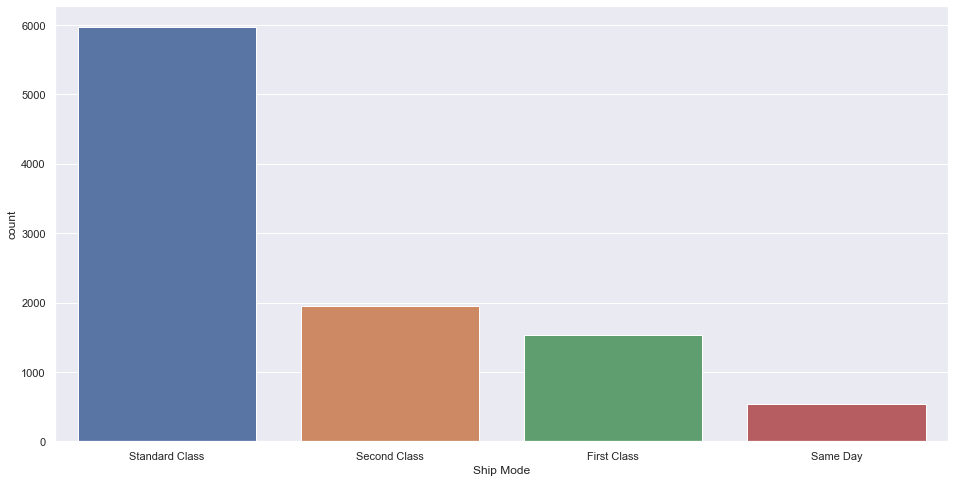

In [17]:
plt.figure(figsize=(16,8))
sns.set_theme(style='darkgrid')
sns.countplot(x = 'Ship Mode', order = df['Ship Mode'].value_counts().index, data=df)
plt.show()

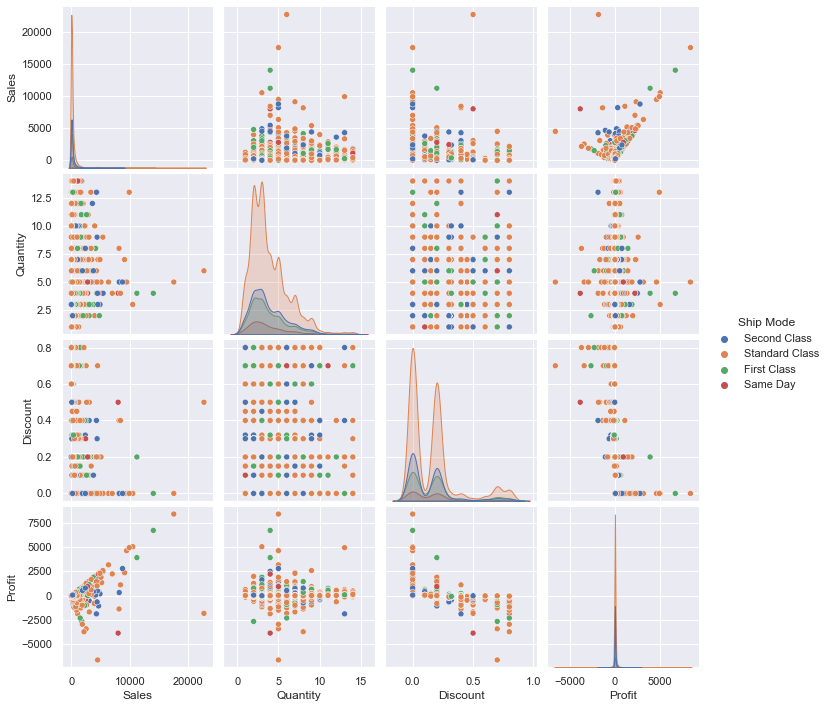

In [18]:
sns.pairplot(hue='Ship Mode', data=df)
plt.show()

In [19]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

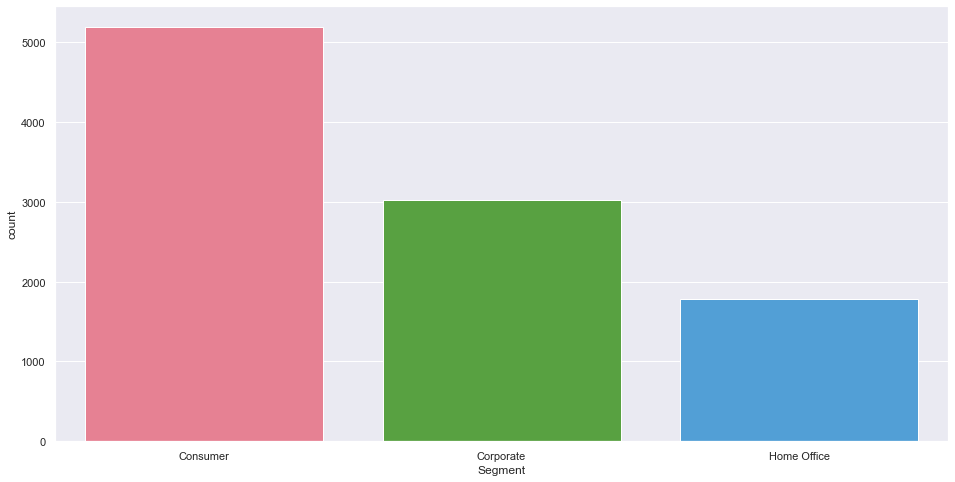

In [20]:
plt.figure(figsize=(16,8))
sns.set_theme(style = 'darkgrid')
sns.countplot(x = 'Segment', order = df['Segment'].value_counts().index, palette='husl', data = df)
plt.show()

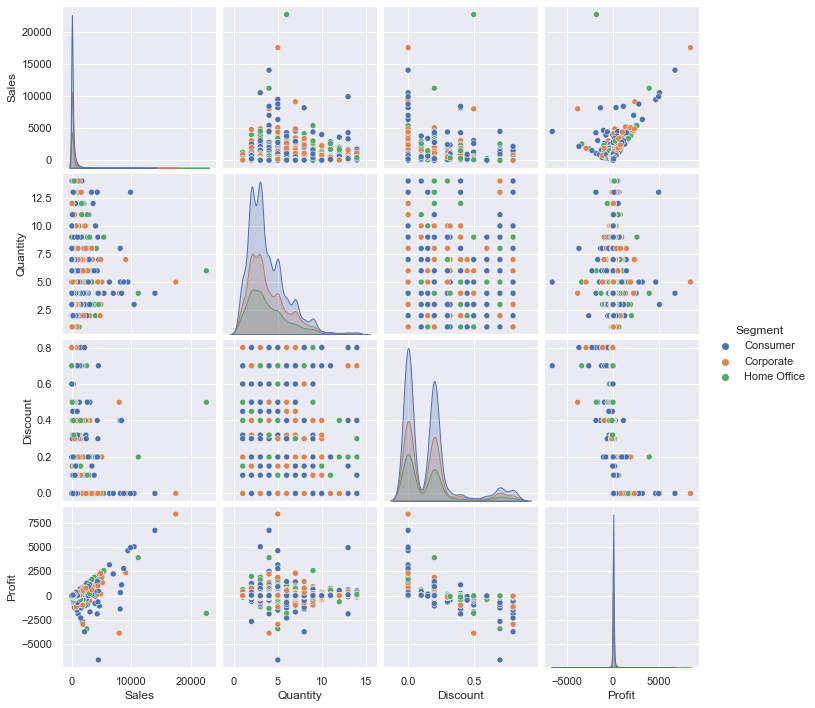

In [21]:
sns.pairplot(hue = 'Segment', data=df)
plt.show()

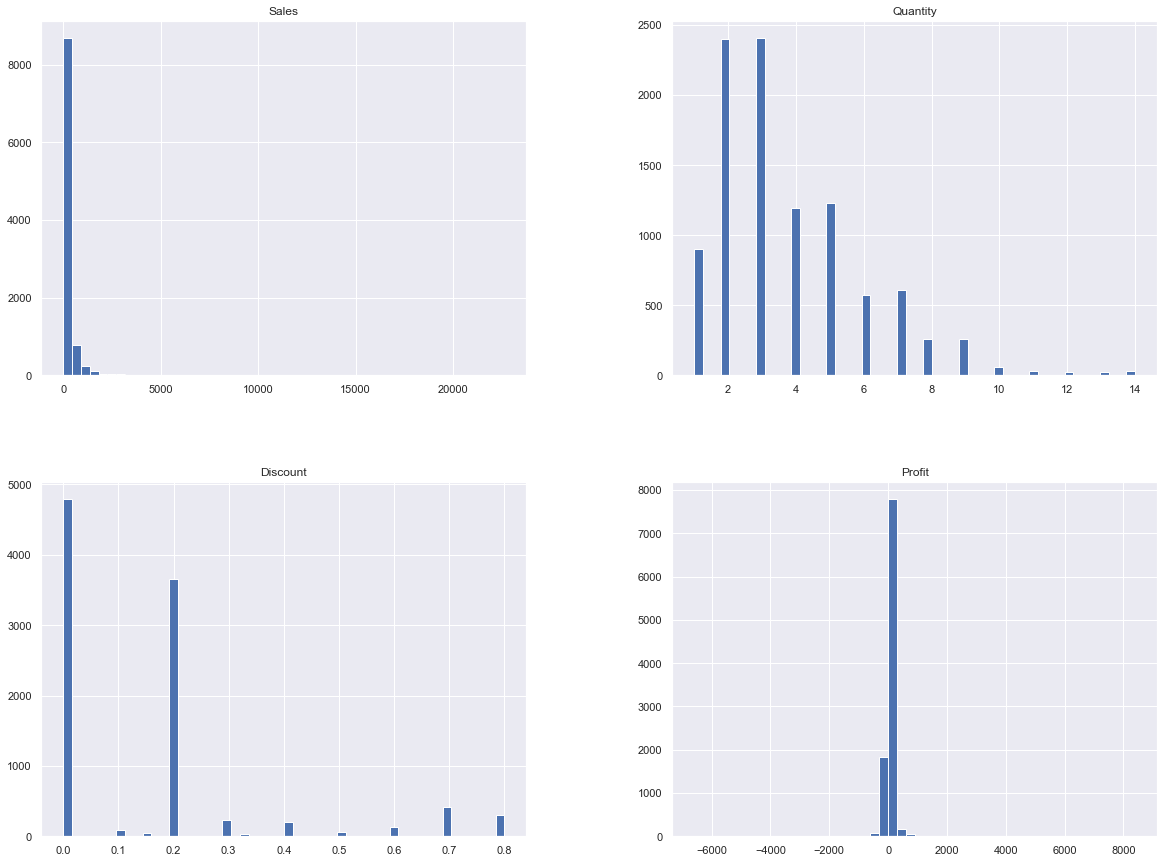

In [22]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [23]:
df['State'].value_counts()

California              2001
New York                1128
Texas                    985
Pennsylvania             587
Washington               506
Illinois                 492
Ohio                     469
Florida                  383
Michigan                 255
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   124
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

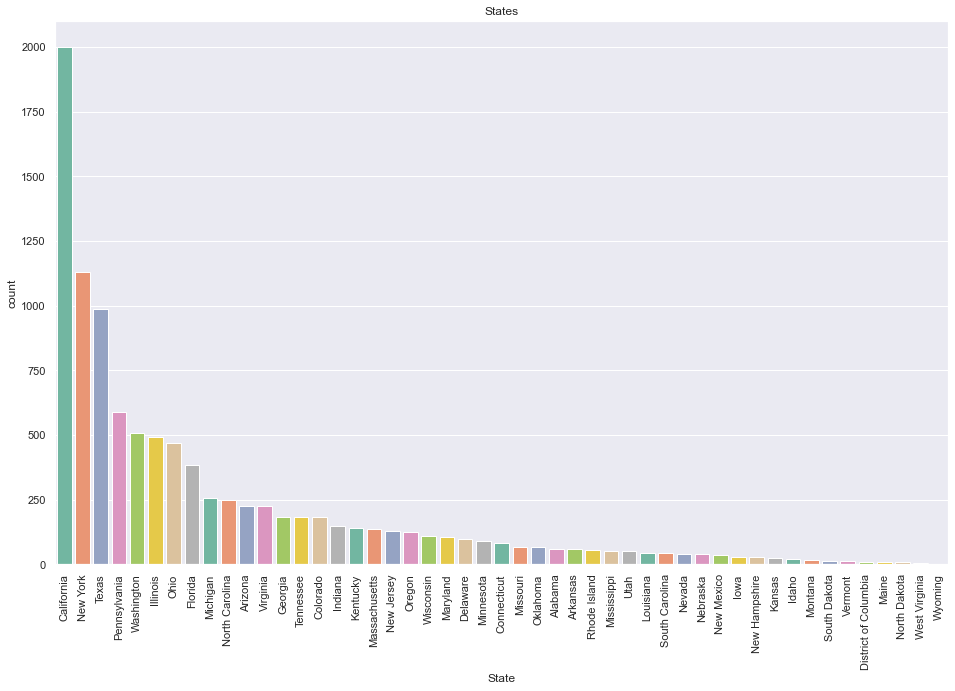

In [24]:
plt.figure(figsize=(16,10))
sns.countplot(x = 'State', order=df['State'].value_counts().index, palette = 'Set2', data = df)
plt.xticks(rotation=90)
plt.title('States')
plt.show()

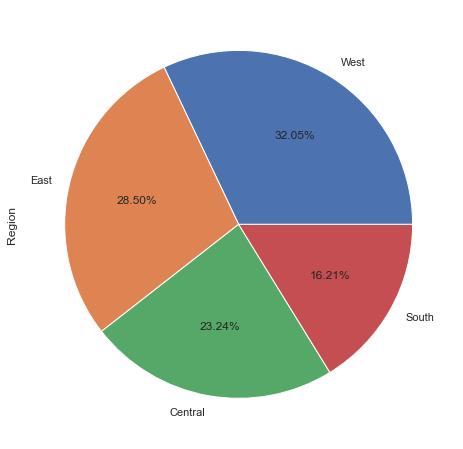

In [25]:
plt.figure(figsize=(16,8))
df['Region'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

**Profit Vs Discount**

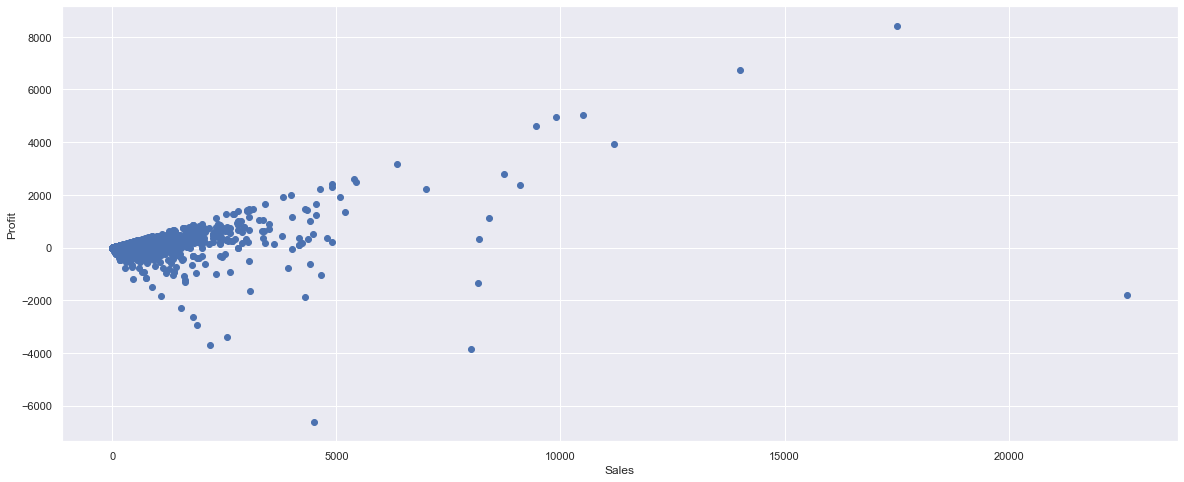

In [26]:
plt.subplots(figsize=(20,8))
plt.scatter(df['Sales'],df['Profit'])
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


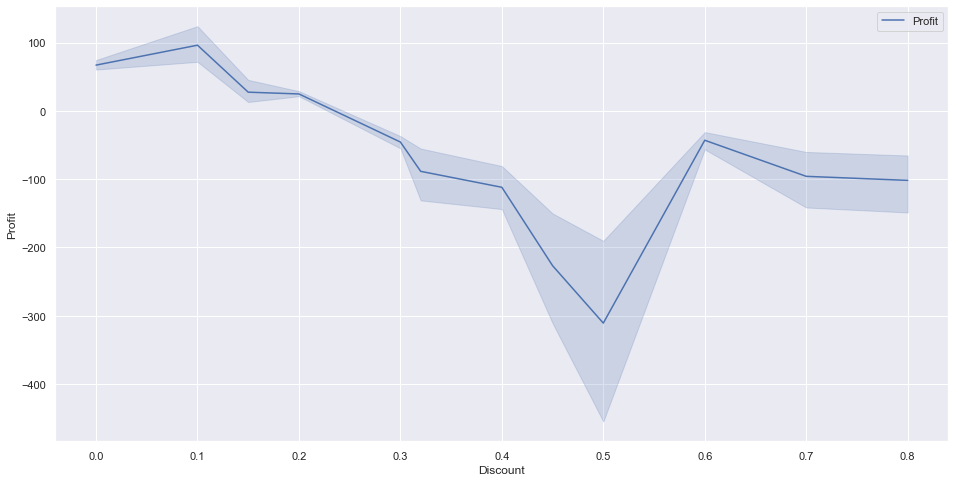

In [27]:
plt.figure(figsize=(16,8))
sns.lineplot('Discount','Profit', label='Profit', data=df)
plt.show()

We can observe that there is no correlation between profit and discount.

In [28]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

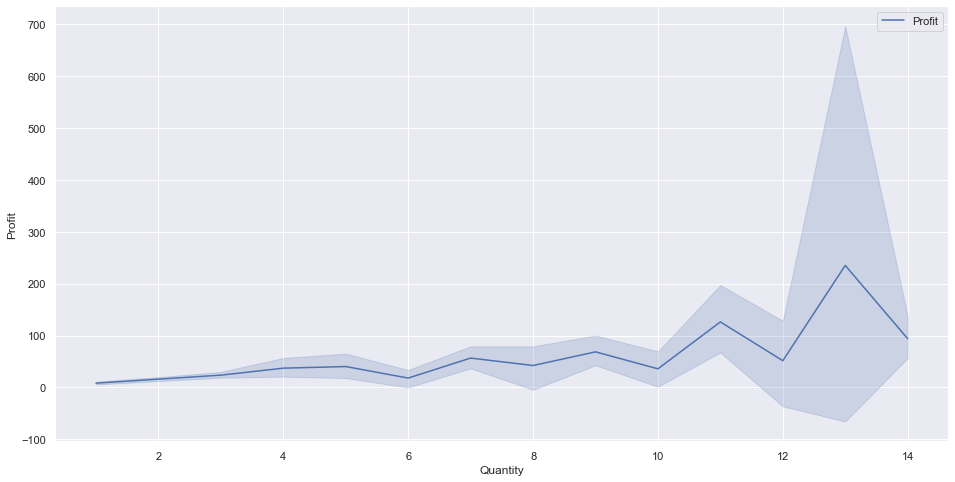

In [29]:
plt.figure(figsize=(16,8))
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=df)
plt.show()

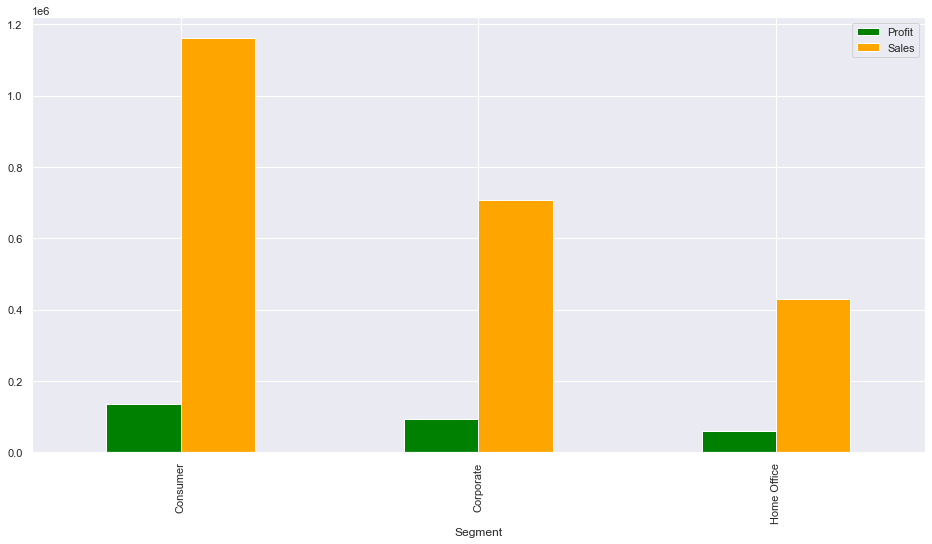

In [30]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['green','orange'],figsize=(16,8))
plt.show()

Profit and sales are maximum in consumer segment and minimum in Home Office segment

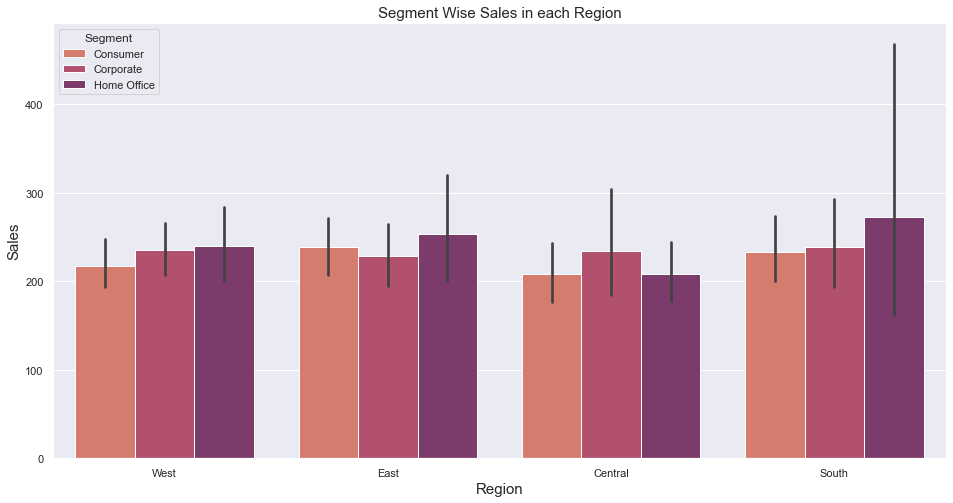

In [31]:
plt.figure(figsize=(16,8))
plt.title('Segment Wise Sales in each Region', fontsize=15)
sns.barplot(x='Region', y='Sales', hue='Segment', data=df, palette = 'flare', order = df['Region'].value_counts().index)
plt.xlabel('Region', fontsize=15)
plt.ylabel('Sales', fontsize=15)
plt.show()

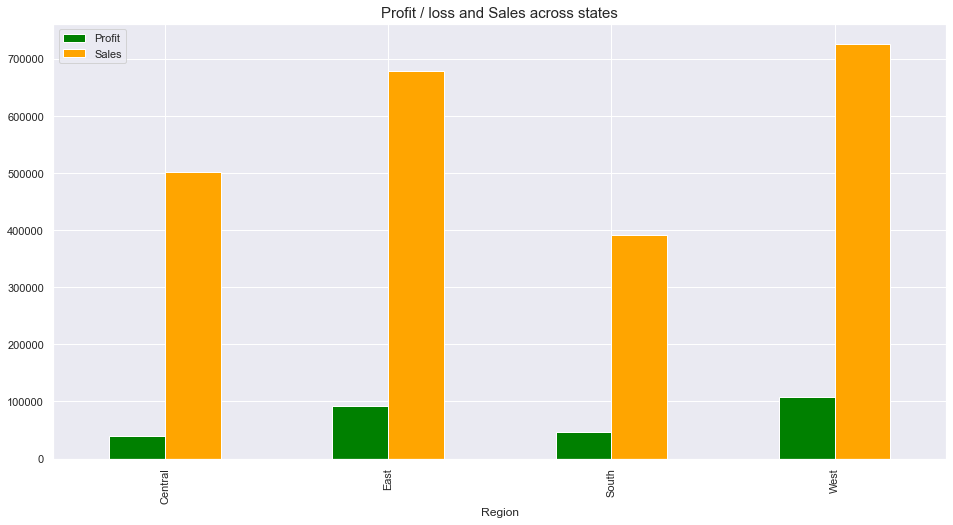

In [32]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['green','orange'],figsize=(16,8))
plt.title('Profit / loss and Sales across states',  fontsize=15)
plt.show()

Profit and sales are maximum in west region and minimum in south region

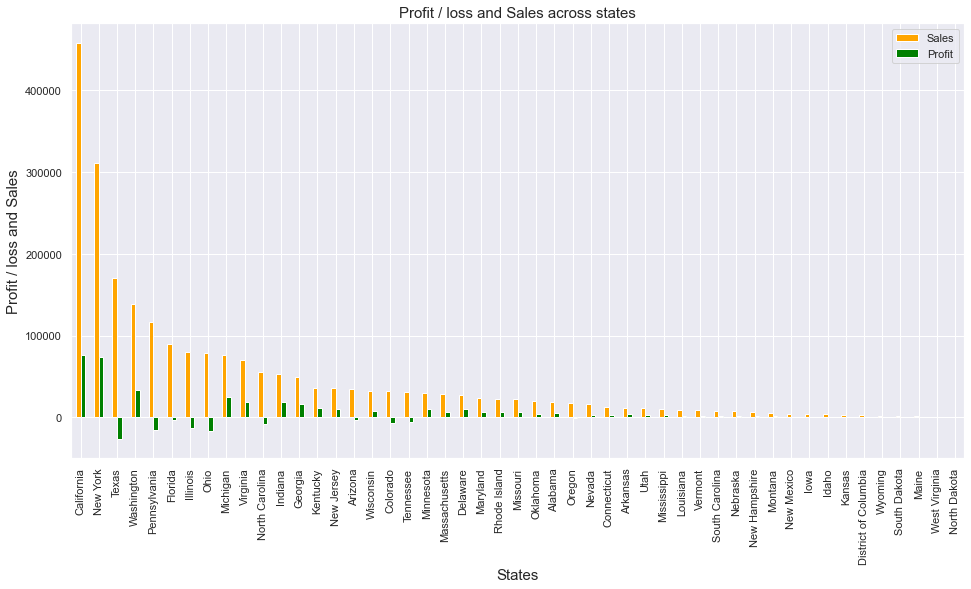

In [33]:
ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['Orange','green'],figsize=(16,8))
plt.title('Profit / loss and Sales across states',  fontsize=15)
plt.xlabel('States', fontsize=15)
plt.ylabel('Profit / loss and Sales', fontsize=15)
plt.show()

We can observe from above plot that:-   
High profit goes to California followed by New York and Washington and  
Loss goes to Texas followed by Pennsylvania and Ohio.

In [36]:
top_states = df['State'].value_counts().nlargest(10)
top_states

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

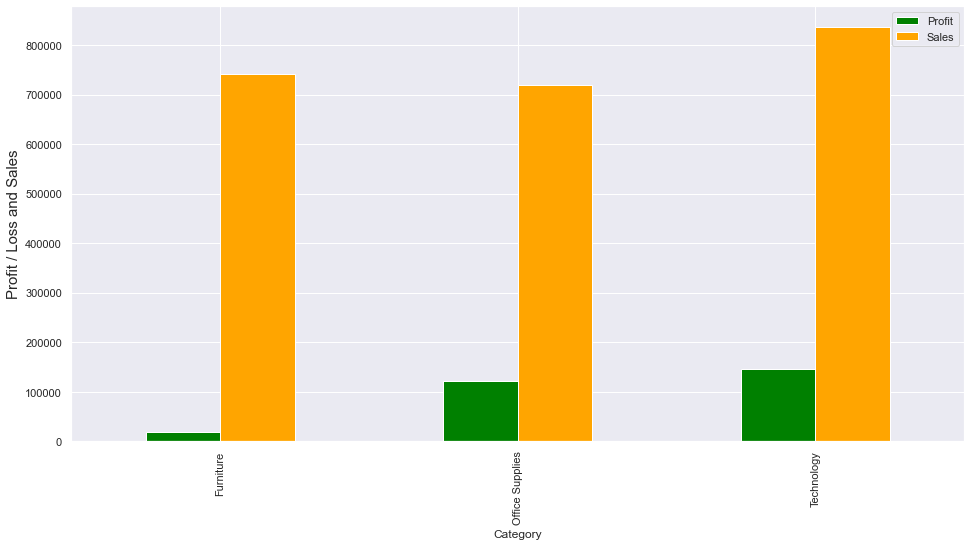

In [42]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(color=['green','orange'], figsize=(16,8))
plt.ylabel('Profit / Loss and Sales', fontsize=15)
plt.show()

From the above plot, we can observe that Technology has the highest Profit and sales followed by Office Supplies and Furniture.

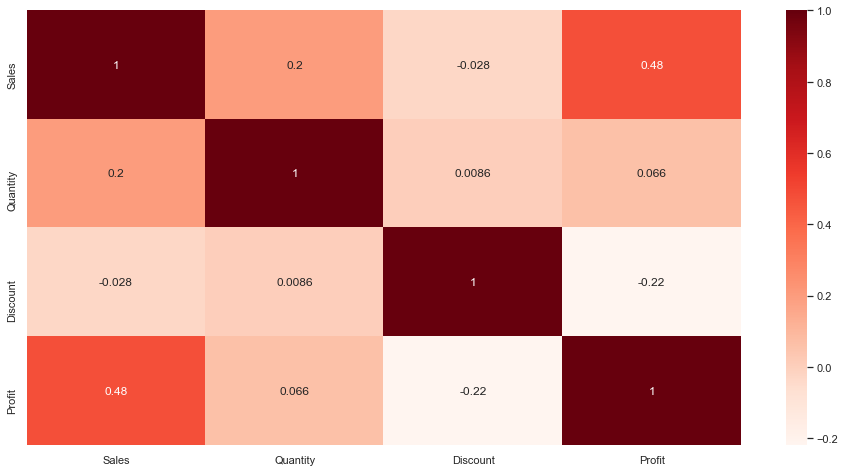

In [53]:
sns.heatmap(df.corr(),cmap='Reds',annot=True);
plt.rcParams['figure.figsize']=(16,8)

we can observe that:-   
Sales and Profit are Moderately Correlated   
Discount and Profit are Negatively Correlated

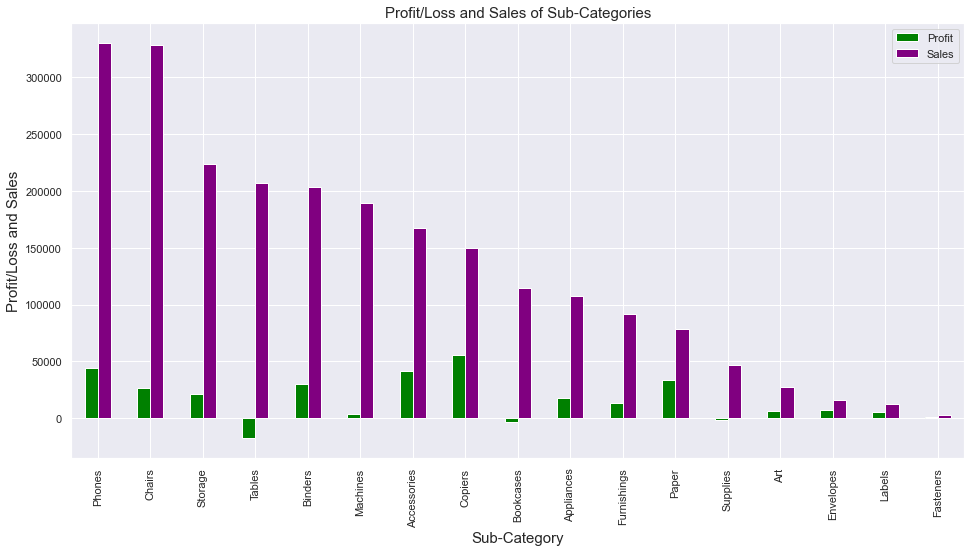

In [54]:
ps = df.groupby('Sub-Category')[['Profit','Sales']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['green','purple'], figsize=(16,8))
plt.title('Profit/Loss and Sales of Sub-Categories', fontsize=15)
plt.xlabel('Sub-Category',fontsize=15)
plt.ylabel('Profit/Loss and Sales', fontsize=15)
plt.show()

We can observe from above plot:- 
    
Phones sub-category have highest sales.  
chairs have almost same sales as Phones but less profit compared to phones.  
Tables sub-category is facing huge loss while Bookmarks sub-category sis facing some loss.